# Handwritten digit recognition on the MNIST dataset with TensorFlow

Following the MNIST tutorial from Tensorflow:

https://www.tensorflow.org/get_started/mnist/beginners

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## The MNIST dataset, which is found at:

http://yann.lecun.com/exdb/mnist/

But tensorflow has built-in scripts to pull the data and load it in:

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Some examples

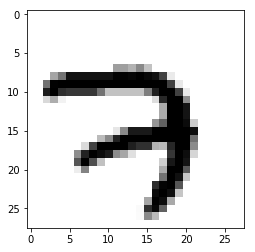

In [3]:
plt.imshow((mnist.train.images[0]).reshape([28,28]), cmap='gray_r');

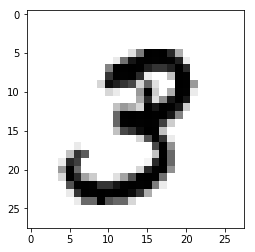

In [4]:
plt.imshow((mnist.train.images[1]).reshape([28,28]), cmap='gray_r');

In [5]:
import tensorflow as tf

In [6]:
# - Input. This will be an array of images, with each image containing 784 pixels.
x = tf.placeholder(tf.float32, [None,784])

# - Weights. 784 pixel -> 10 digits.
W = tf.Variable(tf.zeros([784,10]))

# - Biasses. 10 biases for each digit.
b = tf.Variable(tf.zeros([10]))

## Implementing the model

Evidence:

\begin{equation}
\text{evidence}_{i} = \sum\limits_{j} W_{i,j} x_{j} + b_{i} 
\end{equation}

Softmax function is defined as:

\begin{equation}
\text{softmax}(x)_{i} = \frac{\exp(x_{i})}{\sum\limits_{j} \exp(x_{j)}}
\end{equation}

Output will be a 10 dimensional vector, which can be interpreted as the normalised probabilities for each digit:

\begin{equation}
\vec{y} = \text{softmax}( \vec{\text{evidence}} ) = \text{softmax} \left[ \mathbf{W} \vec{x} + \vec{b}   \right]
\end{equation}

In [7]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Defining the loss function

We'll use the cross entropy function:

\begin{equation}
H_{y'}(y) = - \sum\limits_{i} y_{i}' \log(y_{i}),
\end{equation}

here the index $i$ goes over the second component of the $y$ vector, which correspond to the different digits.

Recommended reading here:

http://colah.github.io/posts/2015-09-Visual-Information/

Notation:
- $y'$: true probability distribution. In this case it is a one-hot vector, $y'=(0,0,...,1,0)$, which only has one element with value 1.
- $y$: predicted probability distribution

In [8]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Launching the model

In [11]:
sess = tf.InteractiveSession()

In [12]:
tf.global_variables_initializer().run()

In [13]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Evaluating the model

In [14]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [15]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9195


Questions:
- How do we get the prediction for a single image?